# 100DaysOfBytewise Machine Learning Fellowship

#### Applying Cross-Validation to Random Forest Classifier
### Exercise: 
#### Implement a random forest classifier and evaluate the model using k-fold cross-validation. Analyze the cross-validation scores to assess model stability.


In [10]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Step 1: Load and inspect the dataset
url = 'adult.csv'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, names=columns)

# Inspect the first few rows to understand the data structure
print("First few rows of the dataset:")
print(data.head())

# Check for missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Manually replace '?' with NaN and then drop missing values
data.replace(' ?', np.nan, inplace=True)
data.dropna(inplace=True)

# Check the shape of the data after dropping missing values
print(f"Data shape after dropping missing values: {data.shape}")

# Verify data content after dropping missing values
print("First few rows of the dataset after dropping missing values:")
print(data.head())

# Encode categorical features
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Check if the data contains the expected columns and no missing values
print(f"Data columns: {data.columns}")
print(f"Missing values in data: {data.isnull().sum().sum()}")

# Split the features and target
X = data.drop('income', axis=1)
y = data['income']

# Check the shapes of X and y
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Implement the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Step 3: Apply k-fold cross-validation
k = 10
cv_scores = cross_val_score(clf, X, y, cv=k)

# Step 4: Analyze the cross-validation scores
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores)}")
print(f"Standard deviation of CV scores: {np.std(cv_scores)}")


First few rows of the dataset:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0  age  workclass  fnlwgt     education  educational-num      marital-status   
1   25    Private  226802          11th                7       Never-married   
2   38    Private   89814       HS-grad                9  Married-civ-spouse   
3   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
4   44    Private  160323  Some-college               10  Married-civ-spouse   

          occupation  relationship   race  gender  capital-gain  capital-loss  \
0         occupation  relationship   race  gender  capital-gain  capital-loss   
1  Machine-op-inspct     Own-child  Black    Male             0             0   
2    Farming-fishing       Husband  White    Male             0             0   
3    Protective-serv       Husband  White    Male             0             0   
4  Machine-op-inspct       Husband  Black    Male          7688             0   

 

c:\Intel\pythone3.7\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


#### Investigating Overfitting and Underfitting in Gradient Boosting Machines
### Exercise: 
#### Train a gradient boosting classifier with varying numbers of estimators and learning rates. Evaluate the model for overfitting and underfitting by comparing training and validation performance.

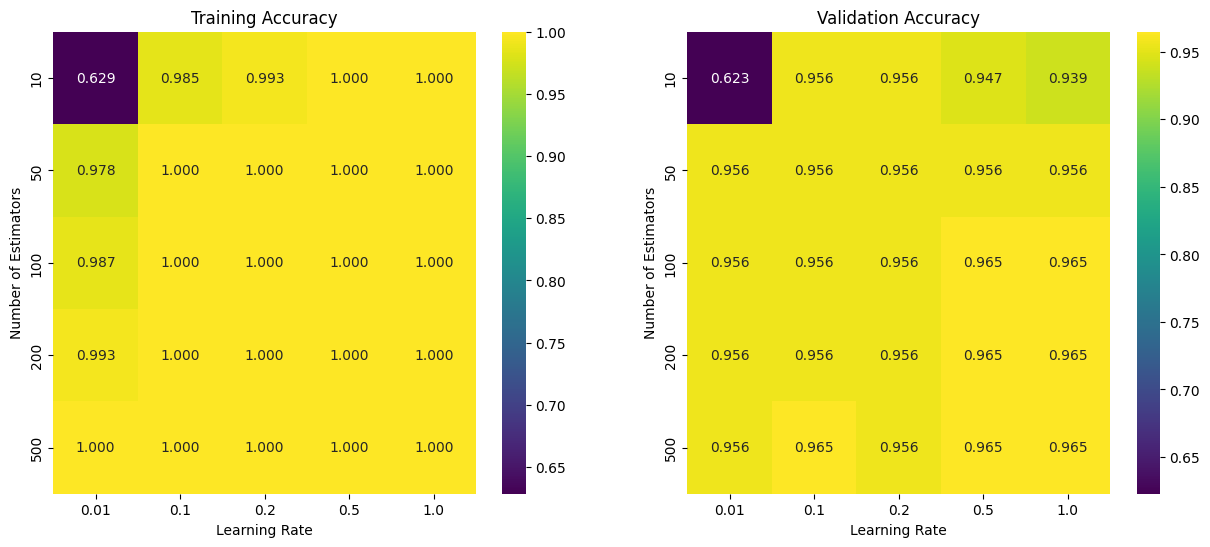

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid
n_estimators_list = [10, 50, 100, 200, 500]
learning_rate_list = [0.01, 0.1, 0.2, 0.5, 1.0]

# Initialize lists to store results
results = []

# Train and evaluate the model with different parameters
for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        gb_clf = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        gb_clf.fit(X_train, y_train)
        
        train_acc = accuracy_score(y_train, gb_clf.predict(X_train))
        val_acc = accuracy_score(y_val, gb_clf.predict(X_val))
        
        results.append({
            'n_estimators': n_estimators,
            'learning_rate': learning_rate,
            'train_acc': train_acc,
            'val_acc': val_acc
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualize the results
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

train_acc_pivot = results_df.pivot_table(values='train_acc', index='n_estimators', columns='learning_rate')
val_acc_pivot = results_df.pivot_table(values='val_acc', index='n_estimators', columns='learning_rate')

sns.heatmap(train_acc_pivot, annot=True, fmt=".3f", cmap="viridis", ax=axs[0])
axs[0].set_title('Training Accuracy')
axs[0].set_xlabel('Learning Rate')
axs[0].set_ylabel('Number of Estimators')

sns.heatmap(val_acc_pivot, annot=True, fmt=".3f", cmap="viridis", ax=axs[1])
axs[1].set_title('Validation Accuracy')
axs[1].set_xlabel('Learning Rate')
axs[1].set_ylabel('Number of Estimators')

plt.show()


### Evaluating Precision, Recall, and F1-Score for Random Forests
## Exercise: 
#### Implement a random forest classifier and calculate precision, recall, and F1-score. Discuss the trade-offs between these metrics and their importance for classification tasks.

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.datasets import load_breast_cancer


# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_val)

# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Print the classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Precision: 0.96
Recall: 0.99
F1-Score: 0.97


### ROC Curve and AUC for Gradient Boosting Classifier
## Exercise: 
#### Implement a gradient boosting classifier and plot the ROC curve. Compute the AUC and interpret how well the model distinguishes between classes.

AUC: 1.00


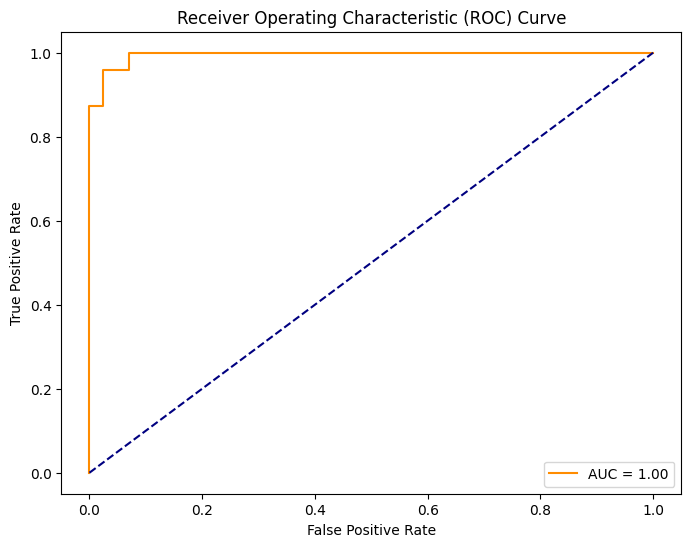

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer


# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Predict probabilities
y_prob = gb_clf.predict_proba(X_val)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
auc = roc_auc_score(y_val, y_prob)

# Print the AUC
print(f"AUC: {auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


###  Model Performance Comparison with Different Metrics
## Exercise: 
#### Compare the performance of different classifiers (e.g., SVM, random forest, gradient boosting) using cross-validation. Evaluate and compare the models based on accuracy, precision, recall, F1-score, and ROC-AUC.

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_breast_cancer

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

classifiers = {
    "SVM": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Define metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each classifier
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')
    results[name] = {'accuracy': scores.mean()}
    
    for metric_name, metric in scoring.items():
        if metric_name != 'accuracy':
            score = cross_val_score(clf, X, y, cv=kf, scoring=metric)
            results[name][metric_name] = score.mean()

# Convert results to DataFrame
results_df = pd.DataFrame(results).T

# Print the comparison table
print(results_df)


                   accuracy  precision    recall        f1   roc_auc
SVM                0.913895   0.894827  0.980399  0.934963  0.891141
Random Forest      0.956094   0.965090  0.966471  0.965068  0.952671
Gradient Boosting  0.945552   0.944314  0.972027  0.957486  0.936678
